In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import logging
import numpy as np

In [45]:
import py21cmfast as p21c

In [46]:
cosmo_params = p21c.CosmoParams()

In [47]:
user_params = p21c.UserParams(
    BOX_LEN=300,
    DIM=600,
    HII_DIM=300
)

In [48]:
init_cond = p21c.initial_conditions(
    cosmo_params=cosmo_params, 
    user_params=user_params
)

In [51]:
def simple_xH_plot(ion: p21c.outputs.IonizedBox, ax: plt.Axes):
    return ax.imshow(ion.xH_box[:, :, 0].T, extent=(0,200,0,200), vmin=0, vmax=1, origin='lower')

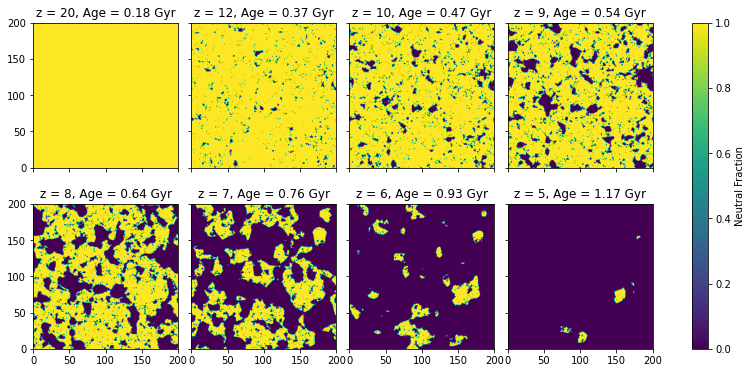

In [52]:
fig, ax = plt.subplots(2, 4, figsize=(14,6), sharex=True, sharey=True, gridspec_kw={"hspace":0.25, 'wspace': 0.05})

for i, z in enumerate([20, 12, 10, 9, 8, 7, 6, 5]):
    ion = p21c.ionize_box(redshift=z, init_boxes=init_cond)
    im = simple_xH_plot(ion, ax.flatten()[i])
    ax.flatten()[i].set_title(f"z = {z}, Age = {cosmo_params.cosmo.age(z):.2f}")
    
cbar = plt.colorbar(im, ax=ax.ravel().tolist())
cbar.set_label("Neutral Fraction")

In [53]:
# with p21c.global_params.use(ZPRIME_STEP_FACTOR=1.1):
lightcone = p21c.run_lightcone(
    redshift = 6,
    max_redshift = 8,
    init_box=init_cond,
    lightcone_quantities=(
        'brightness_temp',
        'xH_box',
        'density'
    ),
    global_quantities=(
        'brightness_temp',
        'xH_box'
    )
)

(<Figure size 288x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f937a1185d0>)

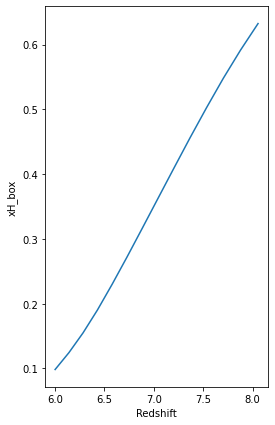

In [54]:
p21c.plotting.plot_global_history(lightcone, kind='xH_box')

In [49]:
ionized = p21c.ionize_box(
    redshift=6.5, 
    init_boxes=init_cond, 
)

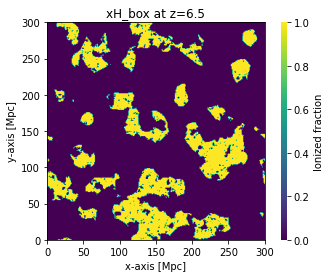

In [55]:
p21c.plotting.coeval_sliceplot(ionized, kind='xH_box')
plt.title("xH_box at z=6.5")
cbar.set_label("Neutral Fraction")